<a href="https://colab.research.google.com/github/shree-cloud/new-fsds/blob/master/fsds_ANN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [66]:
mnist = tf.keras.datasets.mnist

In [67]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [68]:
(x_train_full,y_train_full),(x_test, y_test) = mnist.load_data()

In [69]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [70]:
x_train_full.shape

(60000, 28, 28)

In [71]:
x_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

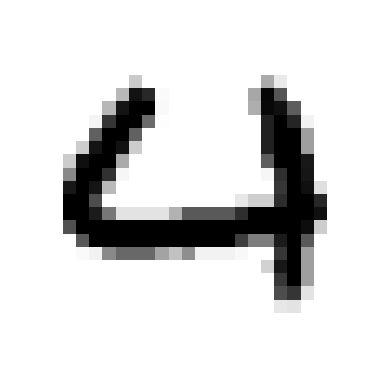

In [72]:
plt.imshow(x_train_full[60],cmap='binary')
plt.axis('off')
plt.show()

<Axes: >

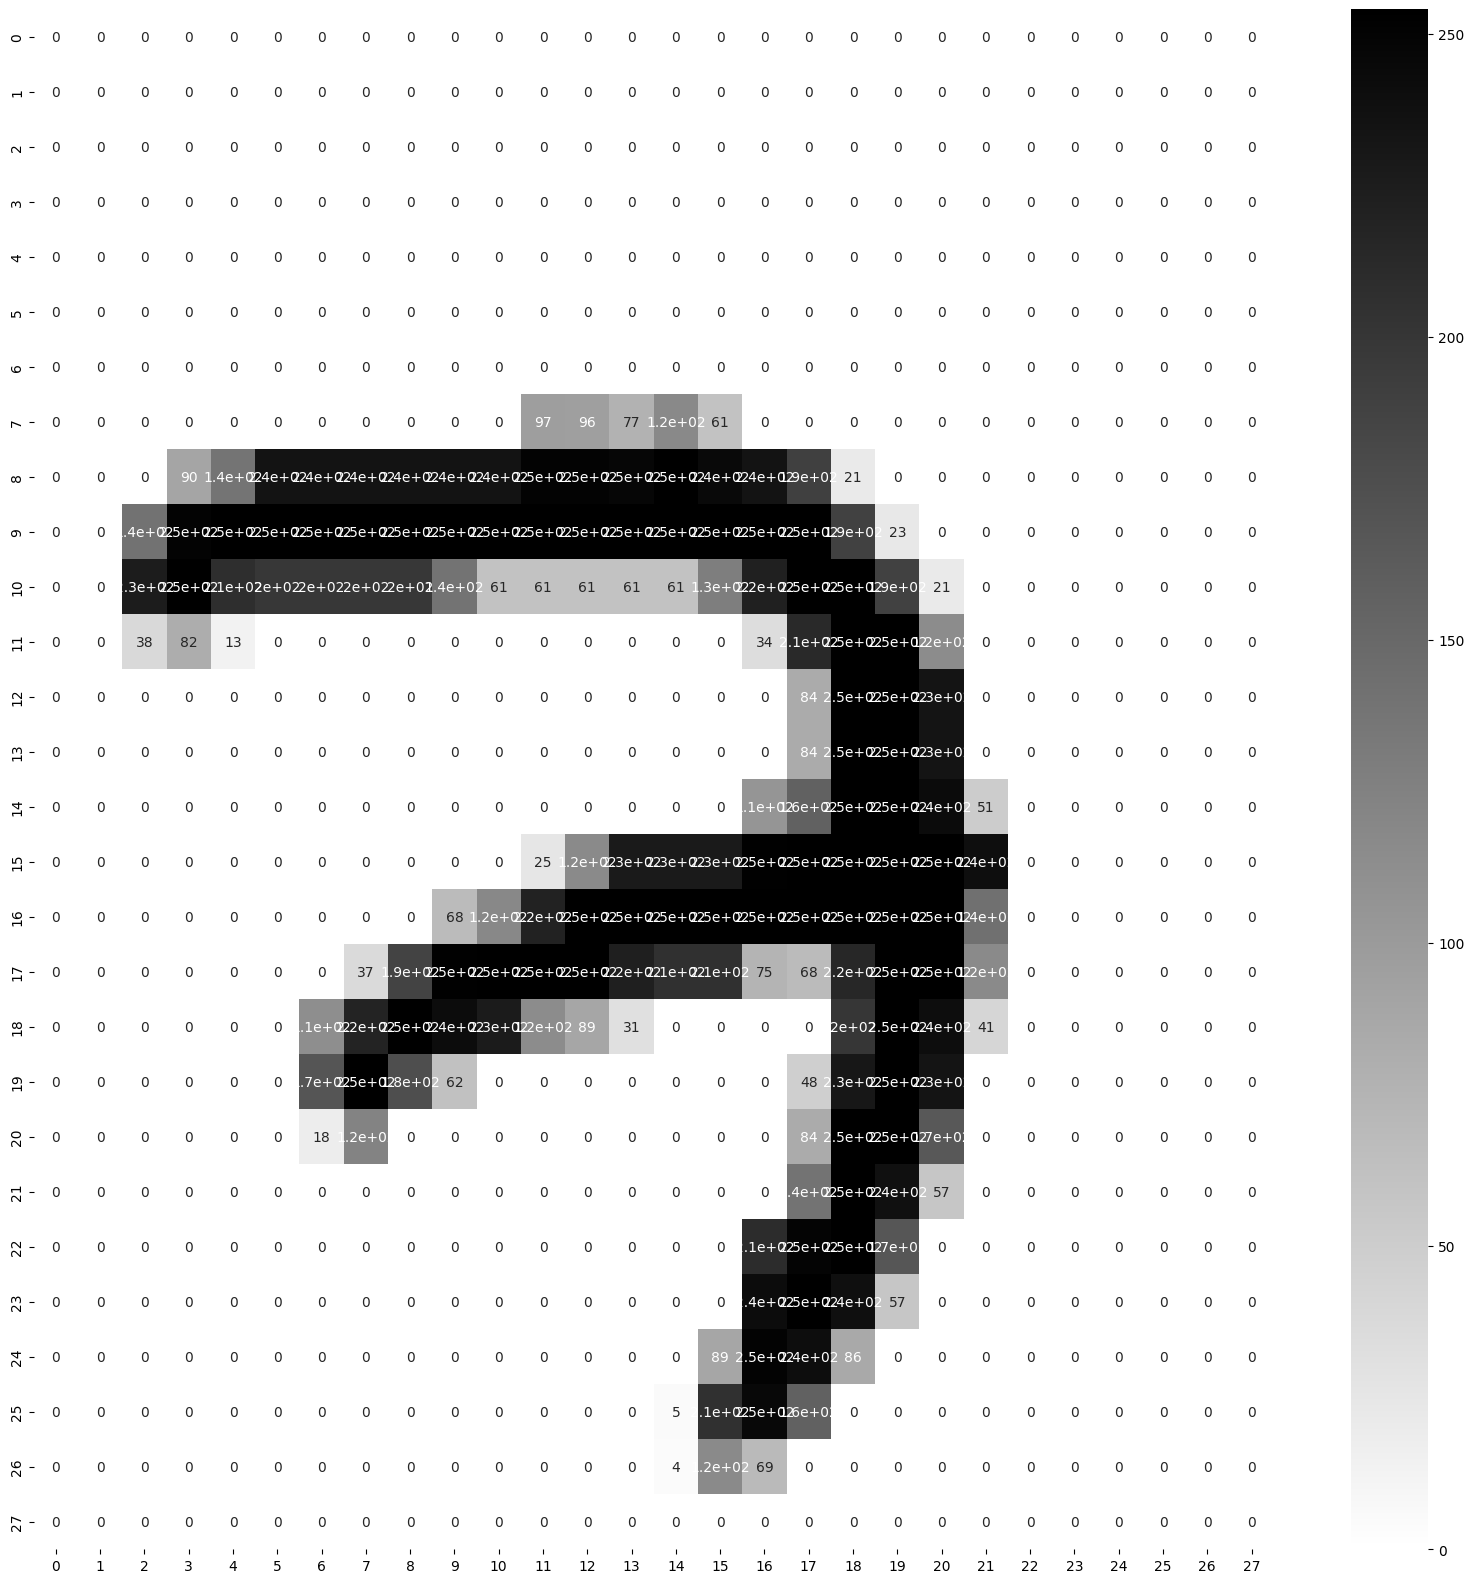

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train_full[5000], annot=True ,cmap='binary')

**unit scaling**

In [74]:
x_valid, x_train = x_train_full[:5000]/255., x_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# here we are using grdient descent so we have to normalise the data hence /255
# 0-255/255  ->  [0-1]

In [75]:
x_test = x_test / 255.

In [76]:
print(x_valid.shape)
print(x_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<Axes: >

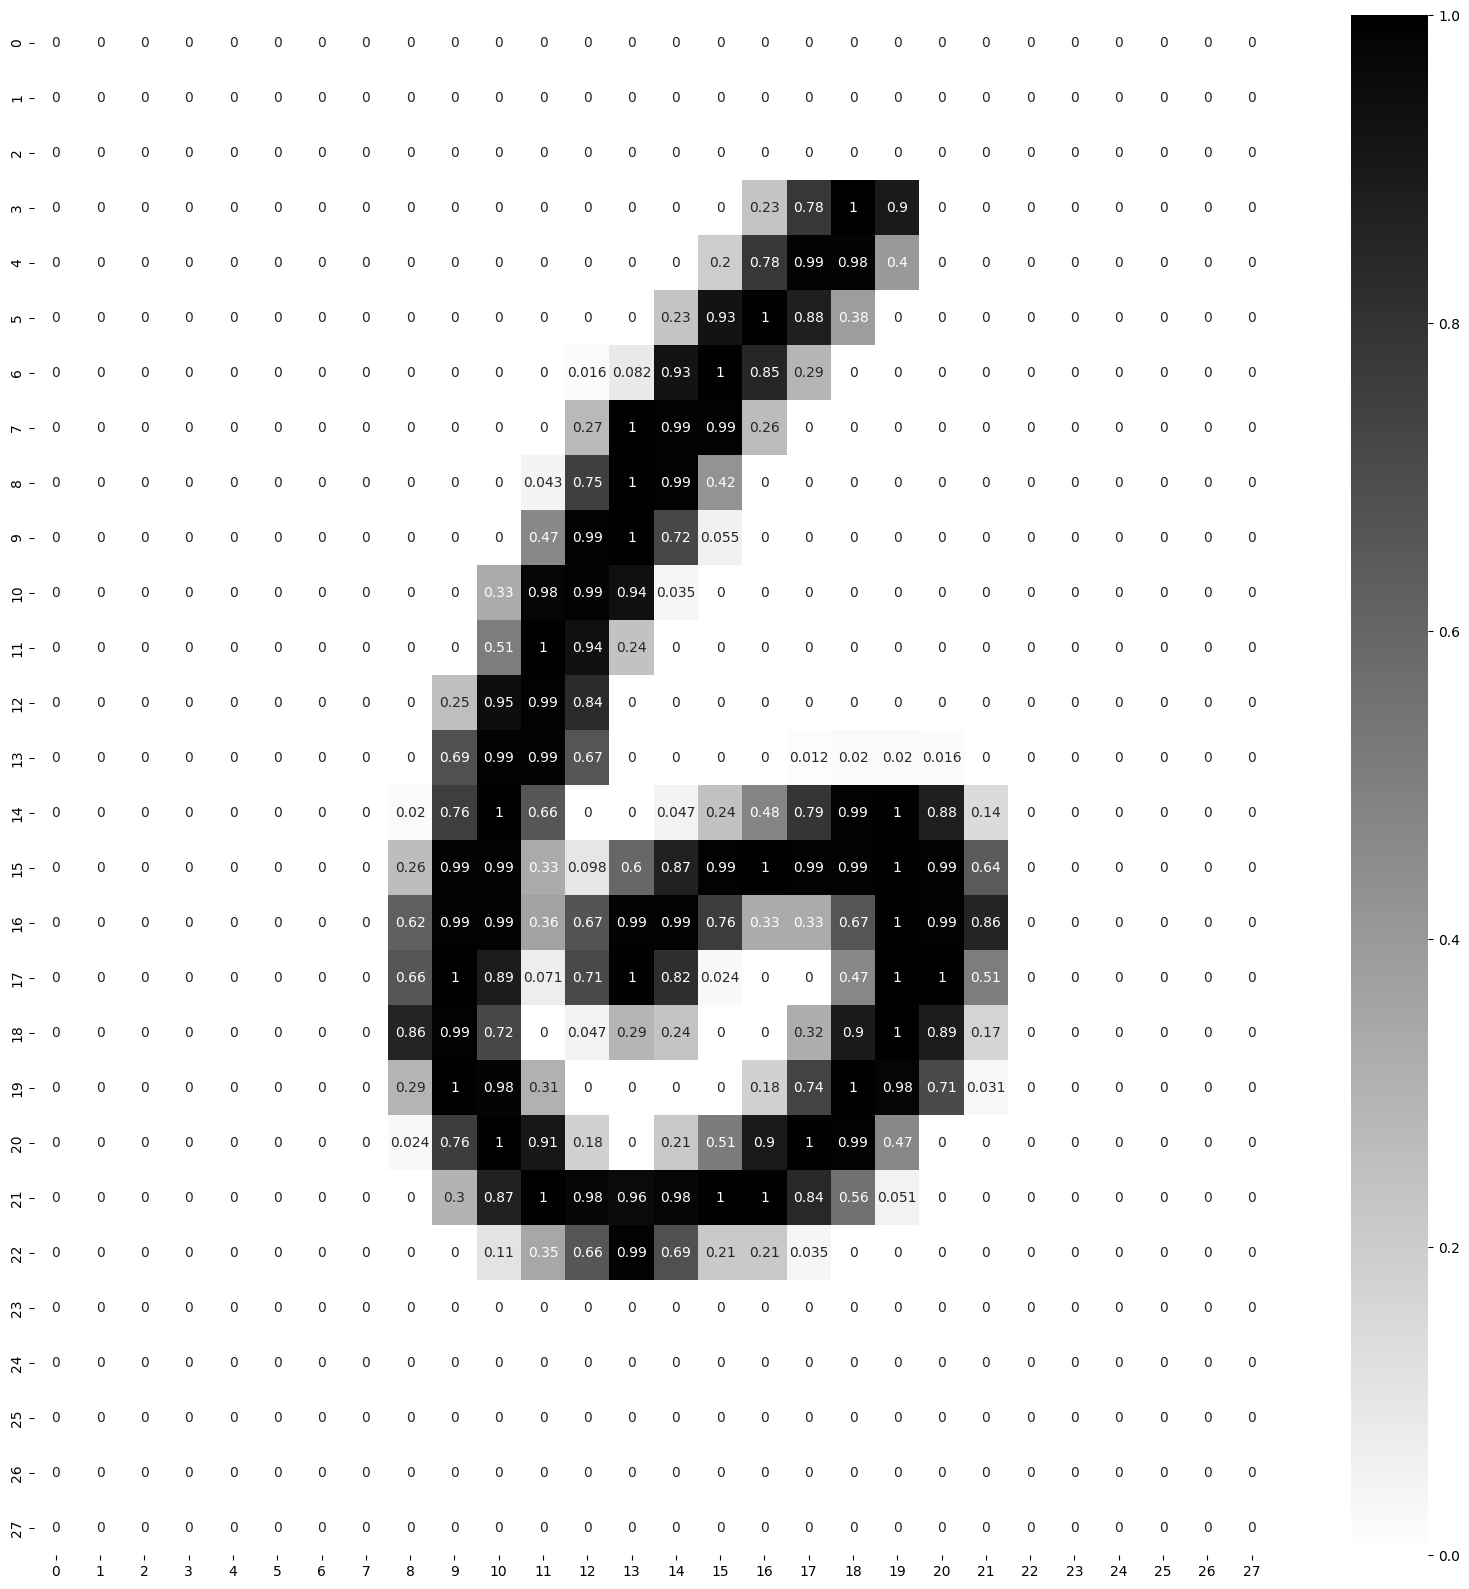

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(x_train[1000], annot=True ,cmap='binary')

In [78]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28], name = "input_layer"),
    tf.keras.layers.Dense(300, activation='relu', name="hidden_layer_1"),
    tf.keras.layers.Dense(100, activation='relu', name="hidden_layer_2"),
    tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
]

In [79]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [80]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [81]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'ADAM'
METRICS = ['accuracy']

In [82]:
model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [83]:
model_clf.layers[1].name

'hidden_layer_1'

In [84]:
hidden1 = model_clf.layers[1]

In [85]:
weights, bias = hidden1.get_weights()

In [86]:
EPOCHS = 5
VALIDATION_SET = (x_valid, y_valid)
history = model_clf.fit(x_train,y_train,epochs=EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2176 - accuracy: 0.9357 - val_loss: 0.1158 - val_accuracy: 0.9660
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9727 - val_loss: 0.0908 - val_accuracy: 0.9738
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.0784 - val_accuracy: 0.9758
Epoch 4/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0852 - val_accuracy: 0.9758


In [87]:
import time

def save_model_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  filename = time.strftime("Model_%Y_%m_%d_%H_%S_.h5")
  model_path = os.path.join(model_dir, filename)
  print(f"Model will be saved to location\n{model_path}")

  return model_path

In [88]:
# model_clf.save(save_model_path())

Model will be saved to location
/content/SAVED_MODELS/Model_2023_04_28_07_24_.h5


In [89]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [90]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.217595,0.935745,0.115819,0.9660
1,0.088747,0.972745,0.090772,0.9738
2,0.059431,0.980818,0.078371,0.9758
3,0.043410,0.986018,0.078786,0.9772
4,0.033728,0.989164,0.085165,0.9758


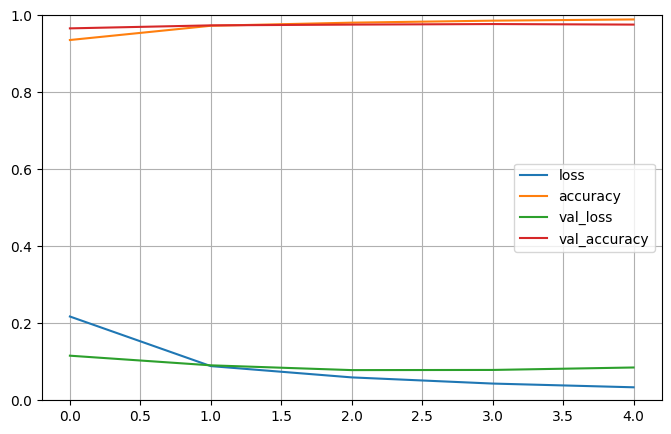

In [91]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [92]:
model_clf.evaluate(x_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9784


0.9783999919891357

In [97]:
from keras.models import load_model
model = load_model('/content/SAVED_MODELS/Model_2023_04_28_07_16_.h5')

In [98]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9811


[0.07520551979541779, 0.9811000227928162]